# Data Exploration

## Sidney Cannon-Bailey
## 11/11/2020

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
# set current path
# set file location on your local machine
dataLoc = '../data/dataWithFeatures.csv'

In [3]:
# load dataset
df = pd.read_csv(dataLoc)

In [4]:
# make sure there's no missing data
df.isnull().any()

df.isnull().sum()

Zip Code           0
Confirmed Cases    2
ZIP                0
PlaceName          0
BINGE              0
CSMOKING           0
LPA                0
OBESITY            0
SLEEP              0
ARTHRITIS          0
CASTHMA            0
BPHIGH             0
CANCER             0
HIGHCHOL           0
KIDNEY             0
COPD               0
CHD                0
DIABETES           0
MHLTH              0
PHLTH              0
TEETHLOST          0
STROKE             0
ACCESS2            0
CHECKUP            0
DENTAL             0
BPMED              0
CHOLSCREEN         0
MAMMOUSE           0
PAPTEST            0
COLON_SCREEN       0
COREM              0
COREW              0
totalPop           3
whiteAlonePop      3
blackAlonePop      3
nativeAlonePop     3
asianAlonePop      3
hawaiiAlonePop     3
otherAlonePop      3
twoOrMorePop       3
COVID_perc         4
white_perc         3
black_perc         3
native_perc        3
asian_perc         3
hawaii_perc        3
other_perc         3
two_plus_perc

Looks like there are a few rows, omit for now. Shouldn't have a significant effect

In [5]:
df = df.dropna().reset_index(drop=True)

df.isnull().any()

    

Zip Code           False
Confirmed Cases    False
ZIP                False
PlaceName          False
BINGE              False
CSMOKING           False
LPA                False
OBESITY            False
SLEEP              False
ARTHRITIS          False
CASTHMA            False
BPHIGH             False
CANCER             False
HIGHCHOL           False
KIDNEY             False
COPD               False
CHD                False
DIABETES           False
MHLTH              False
PHLTH              False
TEETHLOST          False
STROKE             False
ACCESS2            False
CHECKUP            False
DENTAL             False
BPMED              False
CHOLSCREEN         False
MAMMOUSE           False
PAPTEST            False
COLON_SCREEN       False
COREM              False
COREW              False
totalPop           False
whiteAlonePop      False
blackAlonePop      False
nativeAlonePop     False
asianAlonePop      False
hawaiiAlonePop     False
otherAlonePop      False
twoOrMorePop       False


In [6]:
# convert confirmed cases strings to numbers
df['Confirmed Cases']= df['Confirmed Cases'].str.replace(',','')
df['Confirmed Cases'] = df['Confirmed Cases'].astype(int)


In [7]:
# isolate x and y data
x = df.iloc[:,4:-3]
y = df[['majorityWhite','majorityBlack','raciallyDiverse']]

# scale x data
scaledX=  pd.DataFrame(MinMaxScaler().fit_transform(x), columns=list(x))

# add zip codes back to x data
scaledX['ZIP'] = df['ZIP'].copy()


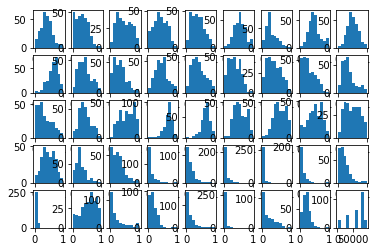

In [8]:
# visualize x data

for colNum, colName in enumerate(list(scaledX)):
    plt.subplot(5,9, colNum+1)
    plt.hist(scaledX[colName])

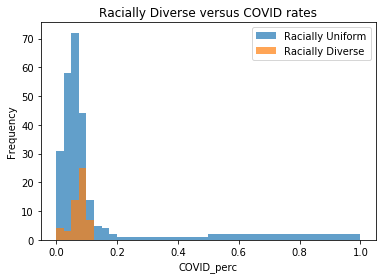

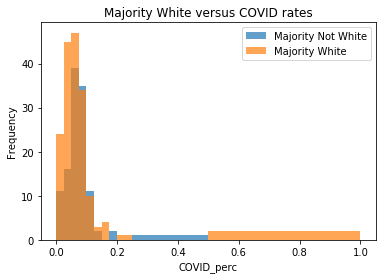

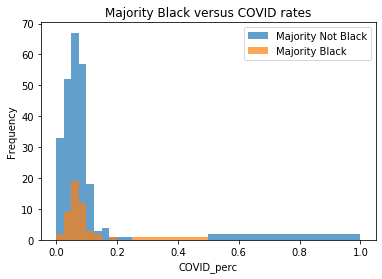

In [9]:
# want to see if racial diversity influences coronavirus cases
plt.figure()
plt.hist(scaledX.loc[y['raciallyDiverse']==0,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Racially Uniform')
plt.hist(scaledX.loc[y['raciallyDiverse']==1,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Racially Diverse')
plt.title('Racially Diverse versus COVID rates')
plt.xlabel('COVID_perc')
plt.ylabel('Frequency')
plt.legend()


plt.figure()
plt.hist(scaledX.loc[y['majorityWhite']==0,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Majority Not White')
plt.hist(scaledX.loc[y['majorityWhite']==1,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Majority White')
plt.title('Majority White versus COVID rates')
plt.xlabel('COVID_perc')
plt.ylabel('Frequency')
plt.legend()


plt.figure()
plt.hist(scaledX.loc[y['majorityBlack']==0,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Majority Not Black')
plt.hist(scaledX.loc[y['majorityBlack']==1,'COVID_perc'], alpha=0.7, bins=[0, .025, .05, .075, .1, .125, .15, .175, .2, .25, .5, 1], label='Majority Black')
plt.title('Majority Black versus COVID rates')
plt.xlabel('COVID_perc')
plt.ylabel('Frequency')
plt.legend()



Unfortunately for our project, and fortunately for the people living in the zip codes we're investigating, there isn't a clear difference in COVID rates between racially uniform/racially diverse zip codes.